In [ ]:
# Install these first. Upload the csv file as well.
install.packages(c('TSA', 'tseries', 'itsmr', 'forecast', 'astsa', 'lmtest'))

library(TSA)
library(tseries)
library(itsmr)
library(forecast)
library(astsa)
library(lmtest)

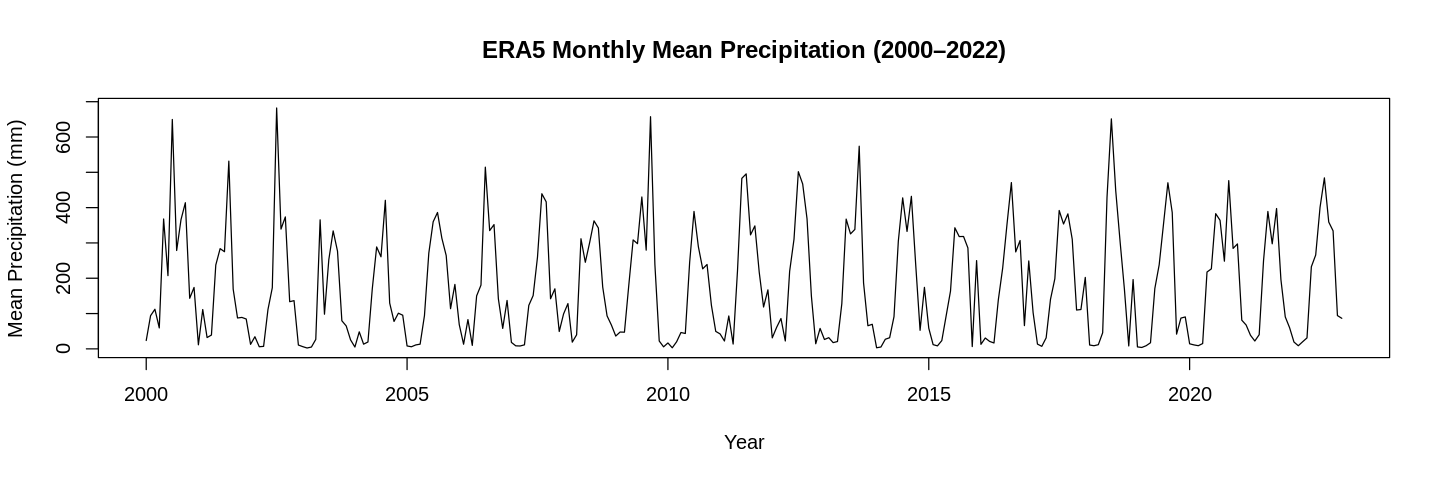

In [3]:
# Read CSV file and transform into a time series object
era5 = read.csv('era5.csv')
era5 = ts(era5$Mean.Precipitation, start=c(2000,01), end=c(2022,12), frequency=12)

# Plot of X_t
options(repr.plot.width=12, repr.plot.height=4)
plot(era5, main = "ERA5 Monthly Mean Precipitation (2000–2022)",
     ylab = "Mean Precipitation (mm)", xlab = "Year")

In [4]:
# ADF and Ljung-Box test to check for stationarity and autocorrelation.
adf.test(era5)
Box.test(era5, type="Ljung")

Warning message in adf.test(era5):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  era5
Dickey-Fuller = -12.927, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary



	Box-Ljung test

data:  era5
X-squared = 102, df = 1, p-value < 2.2e-16


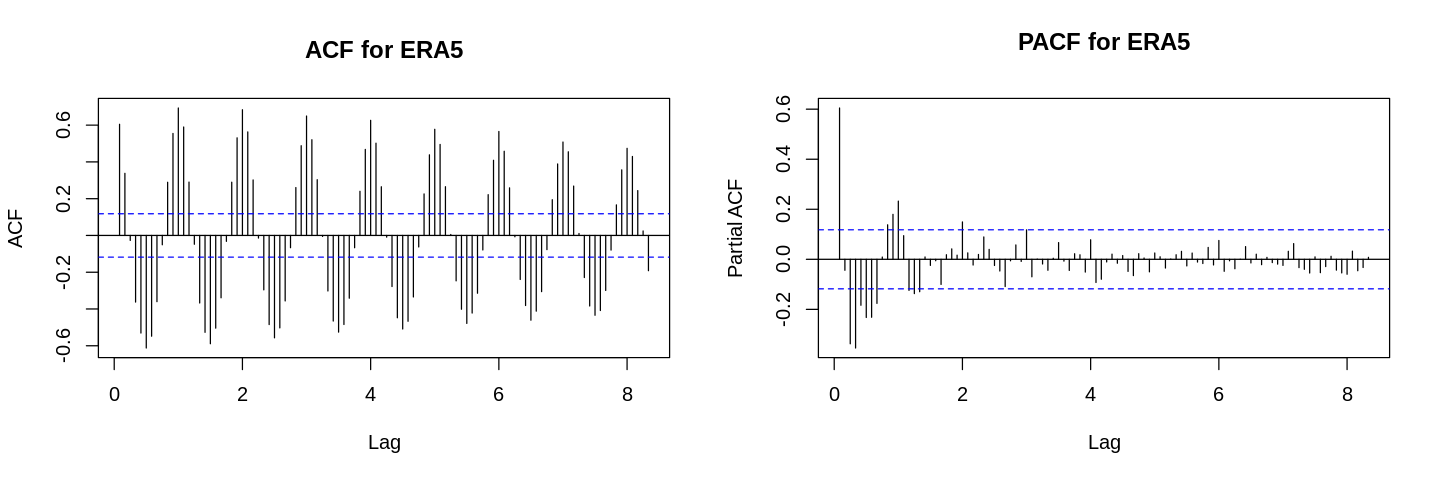

In [5]:
# ACF and PACF of original time series
par(mfrow=c(1,2))
acf(era5, lag=100, main="ACF for ERA5")
pacf(era5, lag=100, main="PACF for ERA5")

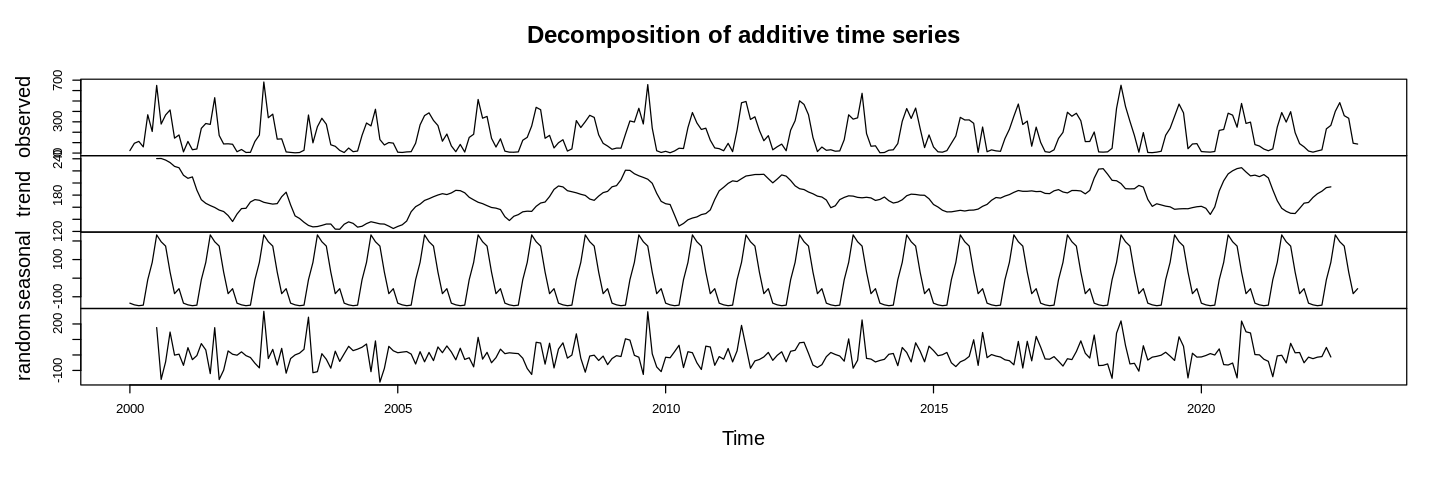

In [6]:
plot(decompose(era5))

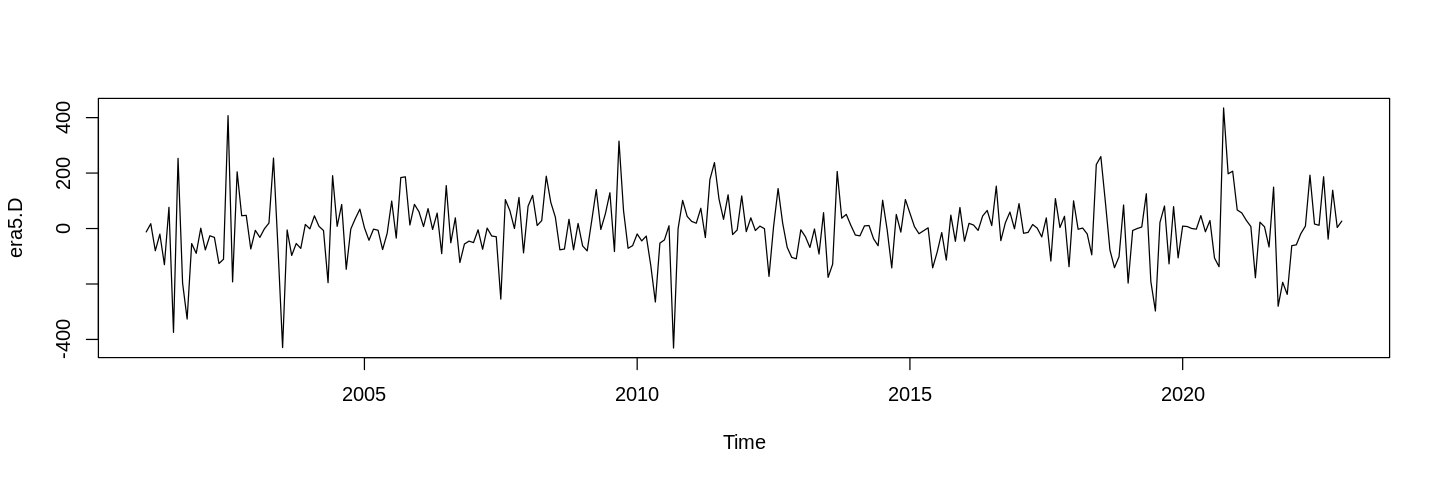

In [7]:
# Seasonal differencing was done
era5.D = diff(era5, 12)
plot(era5.D)

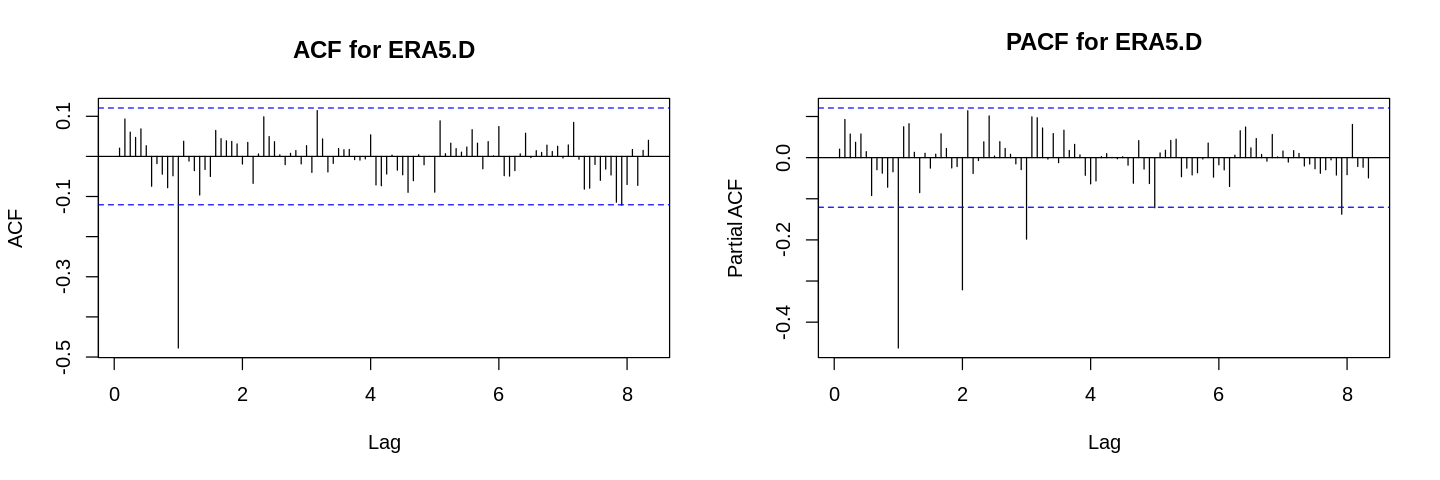

In [8]:
# ACF and PACF of seasonally-differenced data
par(mfrow=c(1,2))
acf(era5.D, lag=100, main="ACF for ERA5.D")
pacf(era5.D, lag=100, main="PACF for ERA5.D")

Series: era5 
ARIMA(0,0,0)(0,1,1)[12] 

Coefficients:
         sma1
      -0.9123
s.e.   0.0525

sigma^2 = 6963:  log likelihood = -1552.7
AIC=3109.39   AICc=3109.44   BIC=3116.54

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -2.526721 81.45286 57.37655 -93.83689 115.6704 0.7292407
                   ACF1
Training set 0.04733317


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
sma1 -0.912253   0.052526 -17.367 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,1,1)[12]
Q* = 14.014, df = 23, p-value = 0.9265

Model df: 1.   Total lags used: 24




	Jarque Bera Test

data:  residuals(fit1)
X-squared = 82.545, df = 2, p-value < 2.2e-16


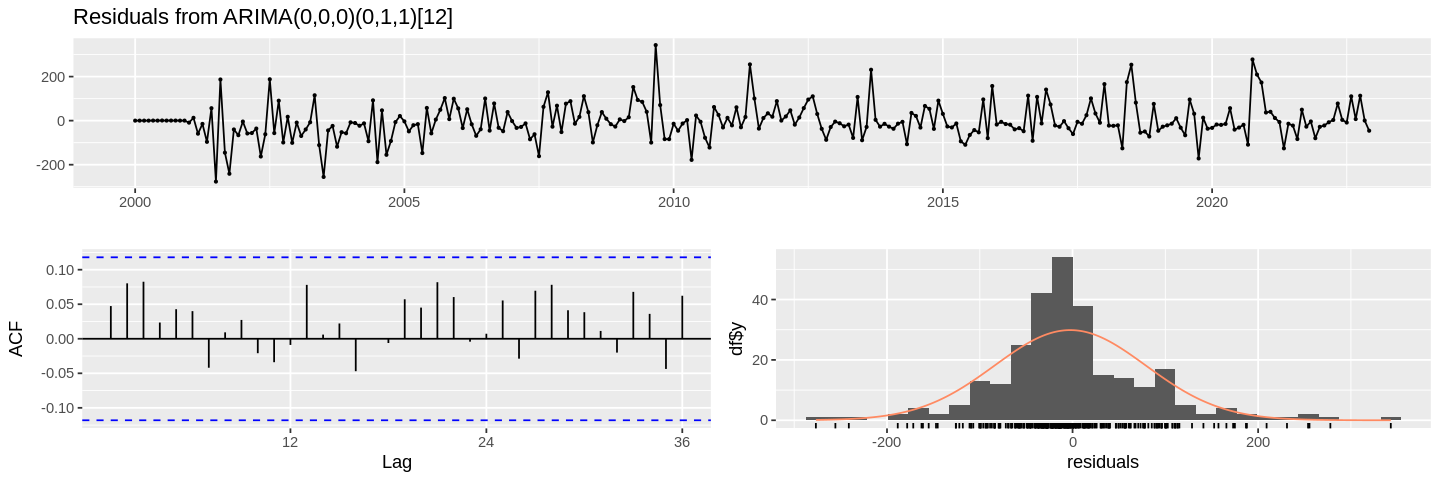

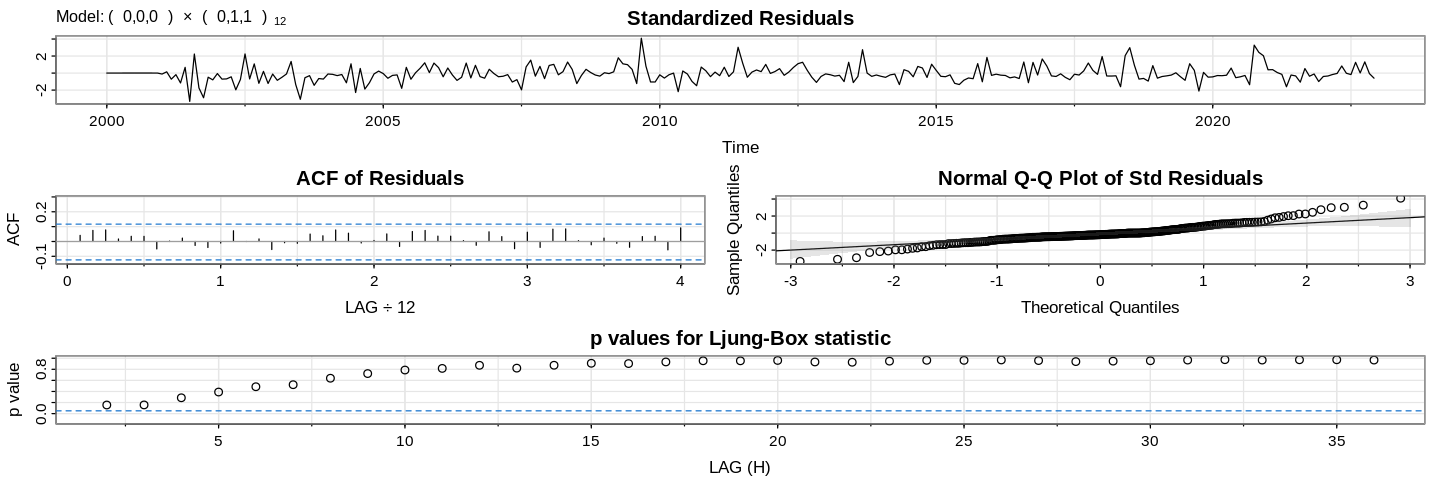

In [9]:
fit1 = Arima(era5, order=c(0,0,0), seasonal=list(order=c(0,1,1), period=12))

summary(fit1)
coeftest(fit1)
checkresiduals(fit1)
jarque.bera.test(residuals(fit1))
invisible(capture.output(sarima(era5, 0,0,0, 0,1,1, 12)))

From the ACF and PACF correlograms, we have the following orders:

* $p=0$
* $d=0$
* $q=0$
* $P=0,1,2,3$
* $D=1$
* $Q=0,1$

We now build the candidate models. Note that the models have a fixed non-seasonal component of $\mathrm{ARMA}(0,0,0)$ and only differ in the orders of their seasonal components $(P,D,Q)_{12}$. Furthermore, we use the original `ERA5` data and simply set the seasonal differencing $D=1$.

Series: era5 
ARIMA(0,0,0)(1,1,1)[12] 

Coefficients:
         sar1     sma1
      -0.0796  -0.8801
s.e.   0.0761   0.0571

sigma^2 = 7005:  log likelihood = -1552.16
AIC=3110.31   AICc=3110.41   BIC=3121.04

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -2.568355 81.54831 57.63351 -94.51297 116.9125 0.7325066
                   ACF1
Training set 0.05353324


z test of coefficients:

      Estimate Std. Error  z value Pr(>|z|)    
sar1 -0.079622   0.076076  -1.0466   0.2953    
sma1 -0.880134   0.057085 -15.4181   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(1,1,1)[12]
Q* = 14.711, df = 22, p-value = 0.8743

Model df: 2.   Total lags used: 24




	Jarque Bera Test

data:  residuals(fit2)
X-squared = 74.497, df = 2, p-value < 2.2e-16


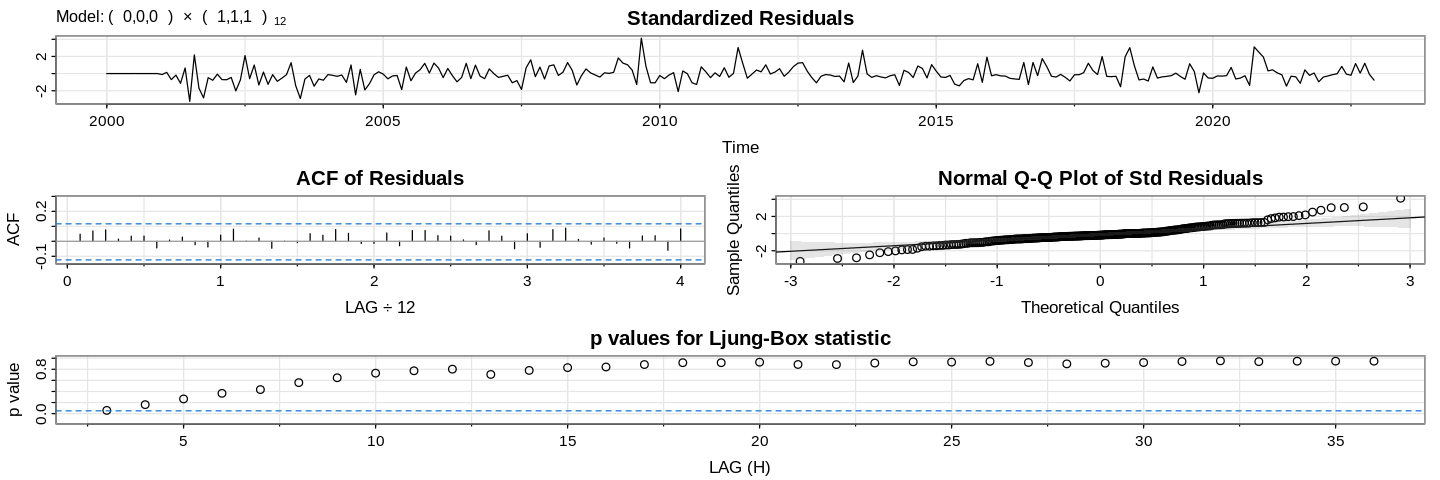

In [10]:
fit2 = Arima(era5, order=c(0,0,0), seasonal=list(order=c(1,1,1), period=12))

summary(fit2)
coeftest(fit2)
checkresiduals(fit2, plot=F)
jarque.bera.test(residuals(fit2))
invisible(capture.output(sarima(era5, 0,0,0, 1,1,1, 12)))

Series: era5 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 = 13166:  log likelihood = -1626.67
AIC=3255.33   AICc=3255.35   BIC=3258.91

Training set error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE       ACF1
Training set -1.991994 112.2191 75.26945 -77.12706 117.048 0.9566548 0.02051991


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,1,0)[12]
Q* = 84.675, df = 24, p-value = 1.076e-08

Model df: 0.   Total lags used: 24



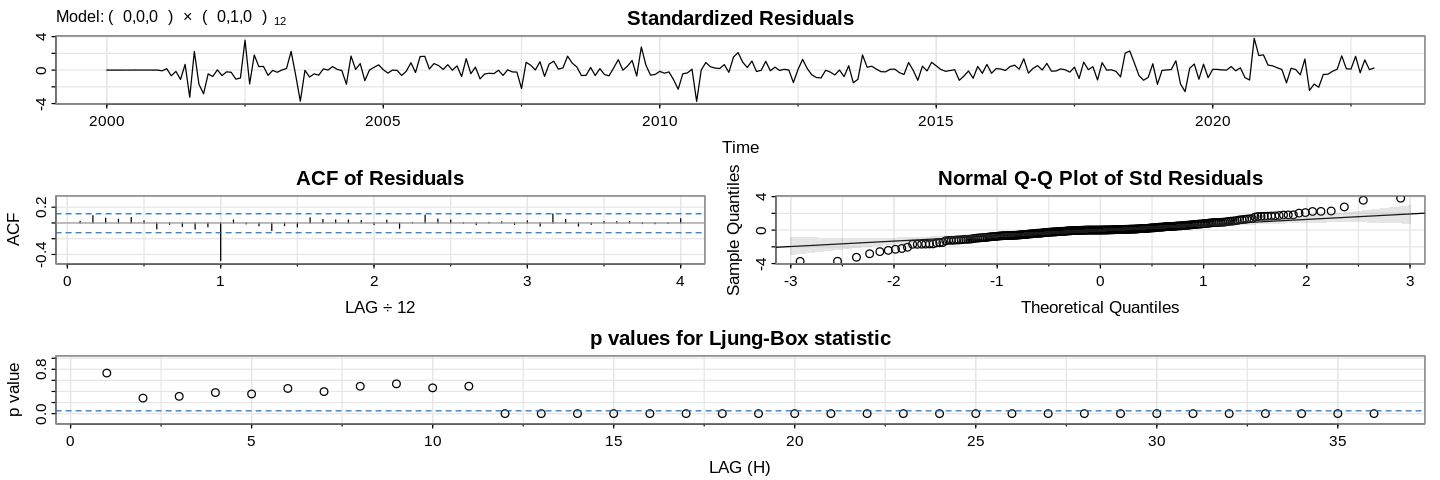

In [11]:
fit3 = Arima(era5, order=c(0,0,0), seasonal=list(order=c(0,1,0), period=12))

summary(fit3)
# coeftest(fit3)
checkresiduals(fit3, plot=F)
invisible(capture.output(sarima(era5, 0,0,0, 0,1,0, 12)))

Series: era5 
ARIMA(0,0,0)(2,1,1)[12] 

Coefficients:
         sar1     sar2     sma1
      -0.0906  -0.0231  -0.8682
s.e.   0.0859   0.0823   0.0712

sigma^2 = 7042:  log likelihood = -1552.12
AIC=3112.23   AICc=3112.39   BIC=3126.54

Training set error measures:
                    ME    RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set -2.568894 81.6039 57.64039 -94.0359 116.4852 0.7325941 0.05496912


z test of coefficients:

      Estimate Std. Error  z value Pr(>|z|)    
sar1 -0.090626   0.085915  -1.0548   0.2915    
sar2 -0.023118   0.082285  -0.2809   0.7788    
sma1 -0.868203   0.071226 -12.1894   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(2,1,1)[12]
Q* = 14.935, df = 21, p-value = 0.8262

Model df: 3.   Total lags used: 24



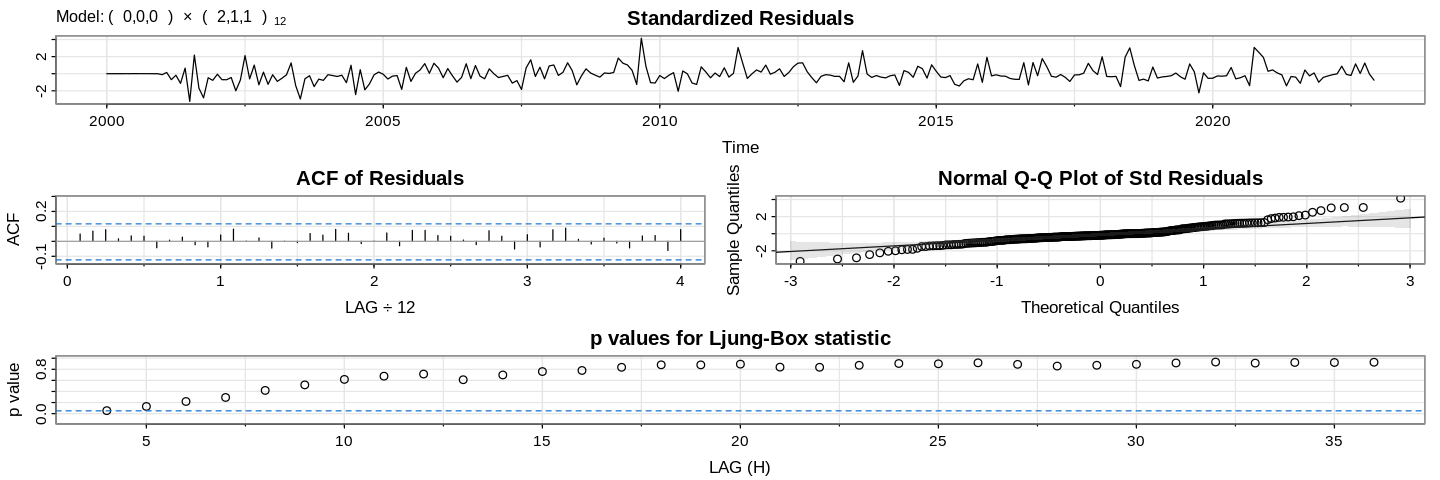

In [12]:
fit4 = Arima(era5, order=c(0,0,0), seasonal=list(order=c(2,1,1), period=12))

summary(fit4)
coeftest(fit4)
checkresiduals(fit4, plot=F)
invisible(capture.output(sarima(era5, 0,0,0, 2,1,1, 12)))

Series: era5 
ARIMA(0,0,0)(3,1,1)[12] 

Coefficients:
         sar1     sar2    sar3     sma1
      -0.0900  -0.0227  0.0010  -0.8686
s.e.   0.1056   0.0962  0.0943   0.0944

sigma^2 = 7069:  log likelihood = -1552.12
AIC=3114.23   AICc=3114.47   BIC=3132.11

Training set error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE       ACF1
Training set -2.572325 81.60413 57.63548 -94.03309 116.474 0.7325316 0.05500566


z test of coefficients:

        Estimate  Std. Error z value Pr(>|z|)    
sar1 -0.09004405  0.10564910 -0.8523   0.3941    
sar2 -0.02270546  0.09616039 -0.2361   0.8133    
sar3  0.00097044  0.09427539  0.0103   0.9918    
sma1 -0.86856884  0.09441255 -9.1997   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(3,1,1)[12]
Q* = 14.932, df = 20, p-value = 0.7803

Model df: 4.   Total lags used: 24



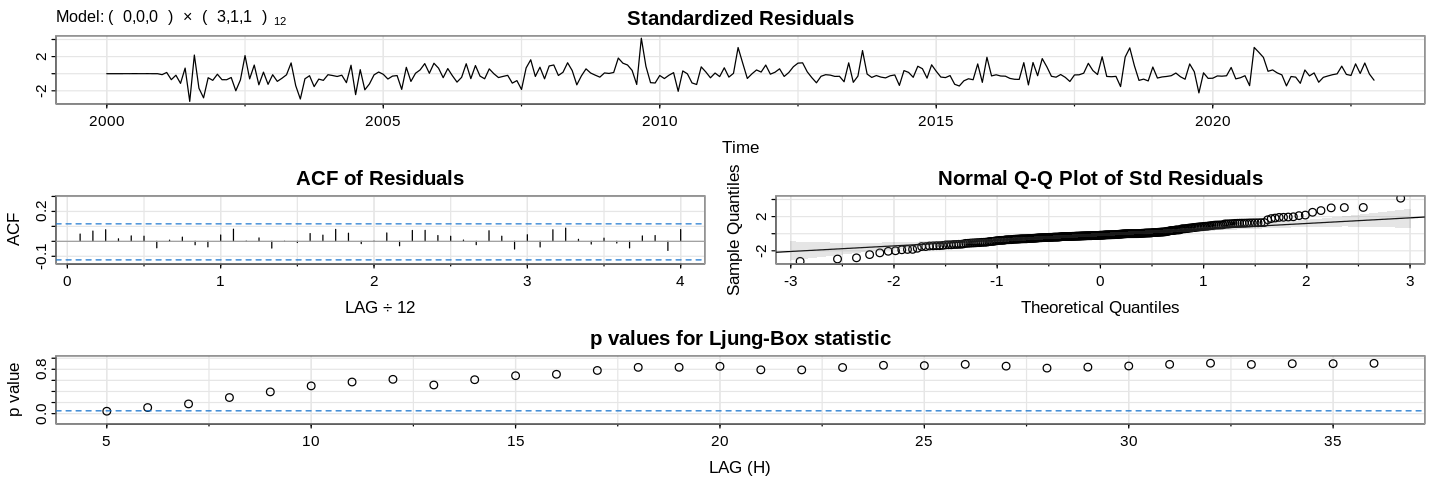

In [13]:
fit5 = Arima(era5, order=c(0,0,0), seasonal=list(order=c(3,1,1), period=12))

summary(fit5)
coeftest(fit5)
checkresiduals(fit5, plot=F)
invisible(capture.output(sarima(era5, 0,0,0, 3,1,1, 12)))

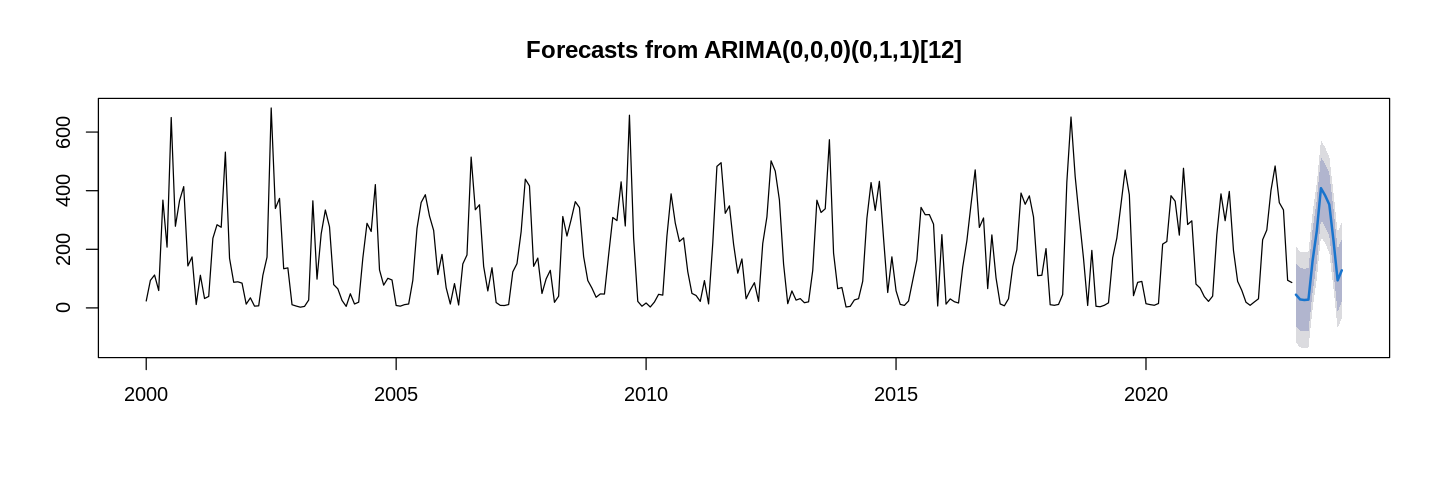

In [14]:
# Forecast
fit1.f = forecast(fit1, h=12)

plot(fit1.f)